# KNN

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [24]:
#加载数据
digits = load_digits()
data = digits.data

In [25]:
#数据探索
print(data.shape)

(1797, 64)


In [28]:
#查看第一幅图像
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [29]:
#第一幅图像代表数字的含义
print(digits.target[0])

0


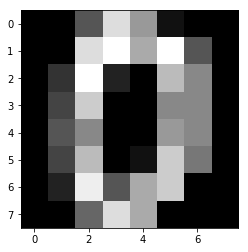

In [30]:
#将第一幅图显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [34]:
#分割数据集，将25%的数据作为测试集，其余作为训练集
train_x,test_x,train_y,test_y = train_test_split(data,digits.target,test_size = 0.25,random_state = 33)
#采用Z-score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [35]:
#创建KNN分类器
knn = KNeighborsClassifier()
knn.fit(train_ss_x,train_y)
predict_y = knn.predict(test_ss_x)
print("knn 准确率: %.4lf" % accuracy_score(test_y,predict_y))

knn 准确率: 0.9756


在做多项式朴素贝叶斯分类器的时候，传入数据不能有负数。因为Z-score会将数值范围化为一个标准的正态分布，即均值为0，方差为1，数值会包含负数。因此采用Min-Max规范化，将数据规范化到【0，1】范围内。

In [37]:
#创建SVM分类器
svm = SVC()
svm.fit(train_ss_x,train_y)
predict_y = svm.predict(test_ss_x)
print('SVM 准确率: %0.4lf' % accuracy_score(test_y,predict_y))
#采用Min-max 规范化
mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)
#创建Navie Bayes 分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x,train_y)
predict_y = mnb.predict(test_mm_x)
print('多项式朴素贝叶斯准确率: %.4lf' % accuracy_score(test_y,predict_y))
#创建CART决策树分类器
dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x,train_y)
predict_y = dtc.predict(test_mm_x)
print('CART 决策树准确率: %.4lf' % accuracy_score(test_y,predict_y))

SVM 准确率: 0.9867
多项式朴素贝叶斯准确率: 0.8844
CART 决策树准确率: 0.8511
